In [1]:
import numpy as np
import matplotlib.pyplot as plt

### 10.1.21, 10.2.11, 10.4.21, 10.5.21, 10.6.21

# 10.2.11  =======================

In [22]:
# Метод конечных разностей
def finite_difference(N):
    h = (b - a) / N
    x = np.linspace(a, b, N+1)

    # Формируем систему уравнений
    A = np.zeros((N+1, N+1))
    F = np.zeros(N+1)

    # Заполняем матрицу A и вектор F
    for i in range(1, N):
        xi = x[i]
        A[i, i-1] = 1/h**2 - p(xi)/(2*h)
        A[i, i] = -2/h**2 + q(xi)
        A[i, i+1] = 1/h**2 + p(xi)/(2*h)
        F[i] = f(xi)

    # Граничные условия
    A[0, 0], A[N, N] = 1, 1
    F[0], F[N] = UA, UB

    # Решаем систему
    U = np.linalg.solve(A, F)

    return x, U

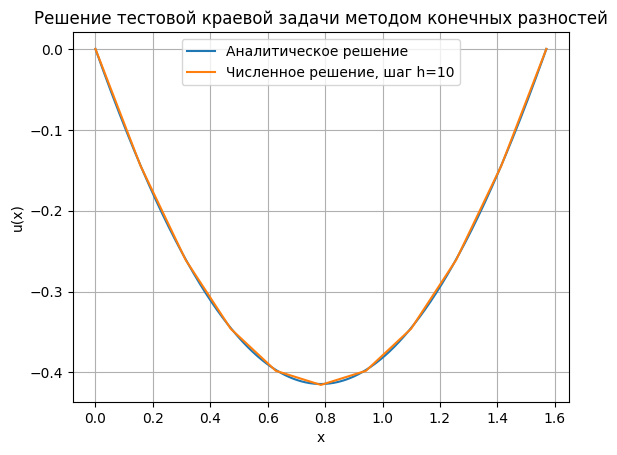

In [23]:
# Тестовая задача
def p(x):
    return 0

def q(x):
    return 1

def f(x):
    return 1

# Граничные условия и параметры
a, b = 0, np.pi/2
UA, UB = 0, 0
epsilon = 0.02
initial_N = 10

x, U = finite_difference(initial_N)
x_analytic = np.linspace(0, np.pi/2, 1000)
U_analytic = -np.sin(x_analytic) - np.cos(x_analytic) + 1

# Построение графика
plt.plot(x_analytic, U_analytic, label=f'Аналитическое решение')
plt.plot(x, U, label=f'Численное решение, шаг h={initial_N}')
plt.xlabel('x')
plt.ylabel('u(x)')
plt.title('Решение тестовой краевой задачи методом конечных разностей')
plt.legend()
plt.grid(True)
plt.show()


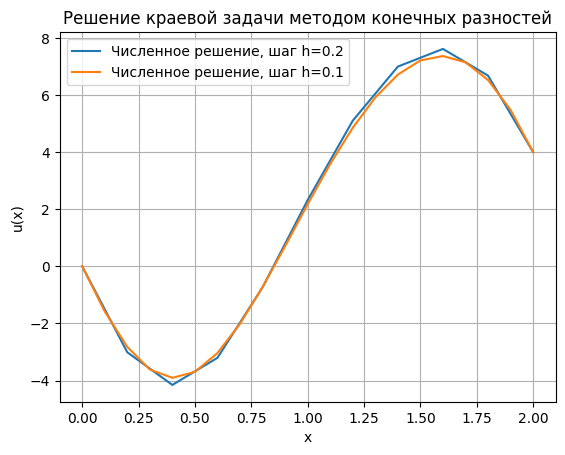

In [25]:
def p(x):
    return (1/4) * (1 - x**2)

def q(x):
    return 5 * (1 + np.cos(x)**2)

def f(x):
    return 15 * np.cos(x)

# Граничные условия и параметры
a, b = 0, 2
UA, UB = 0, 4
epsilon = 0.02
N1 = 10
N2 = 20

x1, U1 = finite_difference(N1)
x2, U2 = finite_difference(N2)

# Построение графика
plt.plot(x1, U1, label=f'Численное решение, шаг h={(b-a)/N1}')
plt.plot(x2, U2, label=f'Численное решение, шаг h={(b-a)/N2}')
plt.xlabel('x')
plt.ylabel('u(x)')
plt.title('Решение краевой задачи методом конечных разностей')
plt.legend()
plt.grid(True)
plt.show()



In [ ]:
# Функция для адаптивного шага
def adaptive_step(initial_N, epsilon):
    N = initial_N
    while True:
        x1, U1 = finite_difference(N)
        x2, U2 = finite_difference(2*N)

        # Интерполяция решения для сравнения
        U1_interp = np.interp(x2, x1, U1)

        # Проверка точности
        diff = np.max(np.abs(U1_interp - U2))
        if diff < epsilon:
            return x2, U2, N

        N *= 2  # Увеличиваем шаг

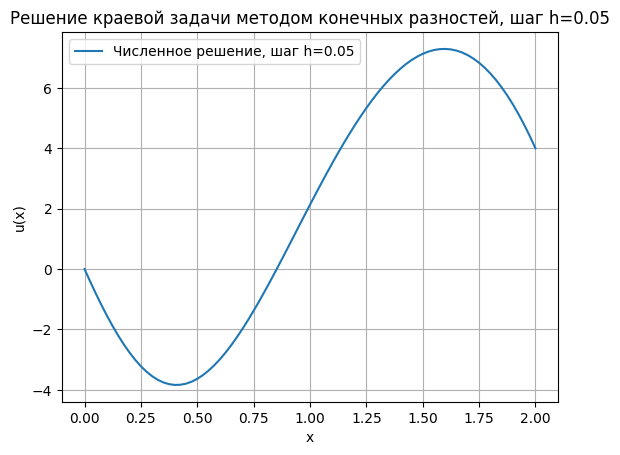

In [27]:
x, U, N_final = adaptive_step(initial_N, epsilon)
plt.plot(x, U, label=f'Численное решение, шаг h={(b-a)/N_final}')
plt.xlabel('x')
plt.ylabel('u(x)')
plt.title(f'Решение краевой задачи методом конечных разностей, шаг h={(b-a)/N_final}')
plt.legend()
plt.grid(True)
plt.show()

# 10.4.21  =======================

In [5]:
def finite_difference_variable_k(N, k, f):
    x = np.linspace(a, b, N+1)
    
    A = np.zeros((N+1, N+1))  # Матрица коэффициентов
    B = np.zeros(N+1)  # Правая часть
    
    # Заполняем систему уравнений
    for i in range(1, N):
        k_i_p_half = (k(x[i]) + k(x[i+1])) / 2  # k_{i+1/2}
        k_i_m_half = (k(x[i]) + k(x[i-1])) / 2  # k_{i-1/2}
    
        A[i, i-1] = -k_i_m_half / h**2
        A[i, i] = (k_i_p_half + k_i_m_half) / h**2
        A[i, i+1] = -k_i_p_half / h**2
    
        B[i] = f(x[i])
    
    # Граничные условия
    A[0, 0] = 1
    B[0] = UA
    
    A[N, N] = 1
    B[N] = UB
    
    u = np.linalg.solve(A, B)
    
    return x, u  # Возвращаем значения u (решение) и x (узлы)

In [6]:
# Зададим параметры задачи
a, b = 0.3, 2.3  # границы отрезка
UA, UB = -1, 1  # граничные условия
N = 150  # число разбиений
h = (b - a) / N  # шаг сетки

def f(x):
    return 2 - np.exp(2*x)


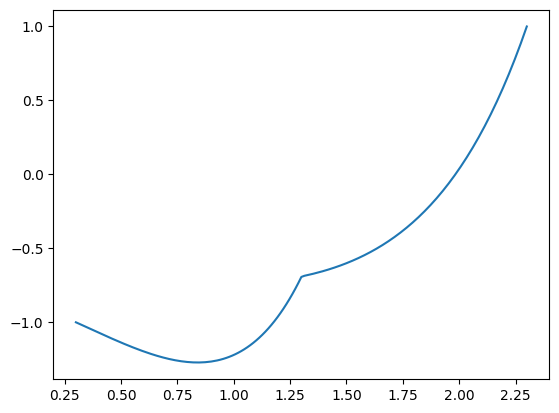

In [7]:
# Зададим переменную теплопроводность k(x) и источник тепла f(x)
def k1(x):
    k1 = 1
    k2 = 10
    if a <= x <= 0.5*(b + a):
        return k1
    if 0.5*(a+b) < x <= b:
        return k2

x, U = finite_difference_variable_k(N, k1, f)
plt.plot(x, U)

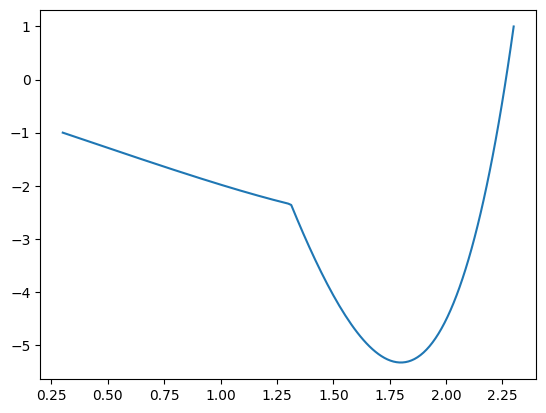

In [8]:
# Зададим переменную теплопроводность k(x) и источник тепла f(x)
def k1(x):
    k1 = 10
    k2 = 1
    if a <= x <= 0.5*(b + a):
        return k1
    if 0.5*(a+b) < x <= b:
        return k2

x, U = finite_difference_variable_k(N, k1, f)
plt.plot(x, U)

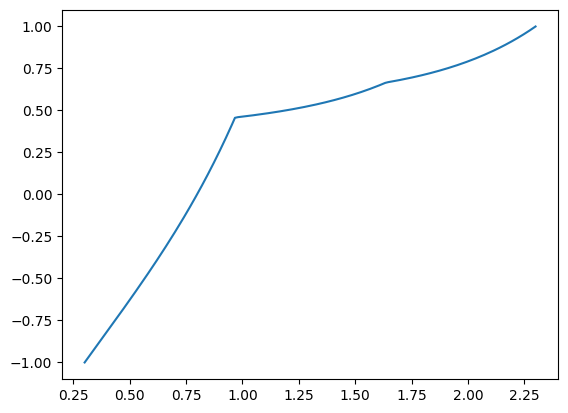

In [9]:
def k2(x):
    k1 = 1
    k2 = 20
    k3 = 50
    if a <= x <= a+(b-a)/3:
        return k1
    if a+(b-a)/3 <= x <= a + 2*(b-a)/3:
        return k2
    if a+2*(b-a)/3 < x <= b:
        return k3
    
x, U = finite_difference_variable_k(N, k2, f)
plt.plot(x, U)

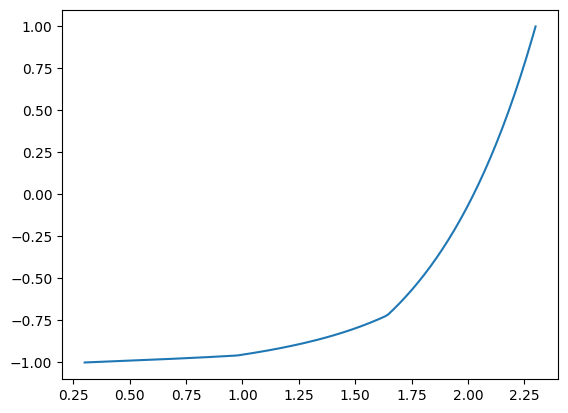

In [10]:
def k2(x):
    k1 = 50
    k2 = 20
    k3 = 10
    if a <= x <= a+(b-a)/3:
        return k1
    if a+(b-a)/3 <= x <= a + 2*(b-a)/3:
        return k2
    if a+2*(b-a)/3 < x <= b:
        return k3
    
x, U = finite_difference_variable_k(N, k2, f)
plt.plot(x, U)

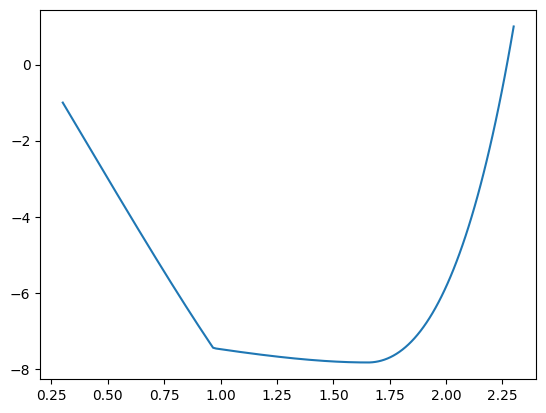

In [11]:
def k2(x):
    k1 = 1
    k2 = 10
    k3 = 1
    if a <= x <= a+(b-a)/3:
        return k1
    if a+(b-a)/3 <= x <= a + 2*(b-a)/3:
        return k2
    if a+2*(b-a)/3 < x <= b:
        return k3
    
x, U = finite_difference_variable_k(N, k2, f)
plt.plot(x, U)

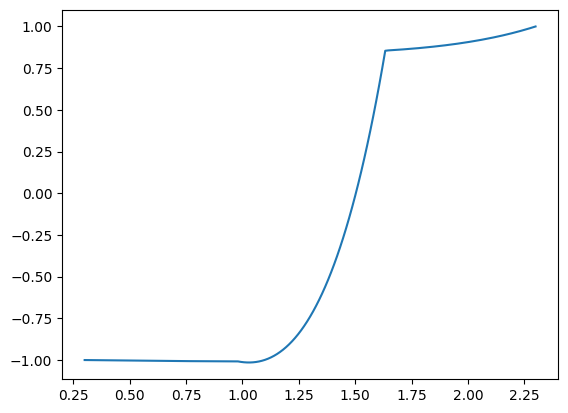

In [12]:
def k2(x):
    k1 = 100
    k2 = 1
    k3 = 100
    if a <= x <= a+(b-a)/3:
        return k1
    if a+(b-a)/3 <= x <= a + 2*(b-a)/3:
        return k2
    if a+2*(b-a)/3 < x <= b:
        return k3
    
x, U = finite_difference_variable_k(N, k2, f)
plt.plot(x, U)

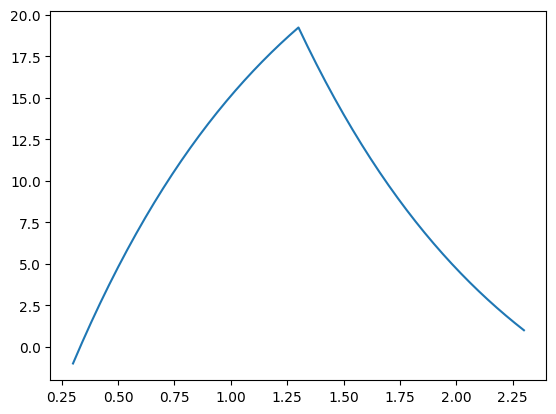

In [22]:
def finite_difference_variable_k_source(N, k):
    x = np.linspace(a, b, N+1)
    
    A = np.zeros((N+1, N+1))  # Матрица коэффициентов
    B = np.zeros(N+1)  # Правая часть
    
    # Заполняем систему уравнений
    for i in range(1, N):
        k_i_p_half = (k(x[i]) + k(x[i+1])) / 2  # k_{i+1/2}
        k_i_m_half = (k(x[i]) + k(x[i-1])) / 2  # k_{i-1/2}
    
        A[i, i-1] = -k_i_m_half / h**2
        A[i, i] = (k_i_p_half + k_i_m_half) / h**2
        A[i, i+1] = -k_i_p_half / h**2
    
        x_0 = (a + b) / 2
        i_0 = np.argmin(np.abs(x - x_0))  # Индекс ближайшего узла
        B[i_0] += c / h  # Добавляем источник тепла
    
    # Граничные условия
    A[0, 0] = 1
    B[0] = UA
    
    A[N, N] = 1
    B[N] = UB
    
    u = np.linalg.solve(A, B)
    
    return x, u  # Возвращаем значения u (решение) и x (узлы)

c = 1

def k(x):
    return np.exp(x)

x, U = finite_difference_variable_k_source(N, k)
plt.plot(x,U)

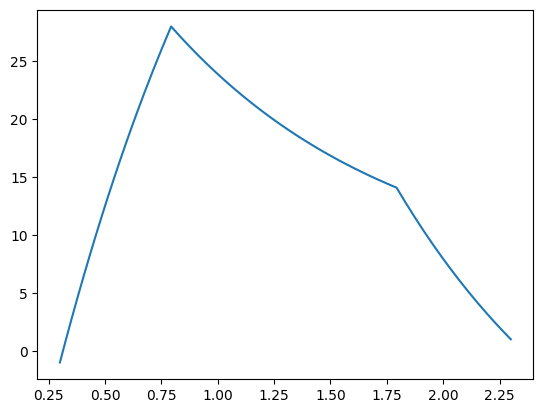

In [25]:
def finite_difference_variable_k_source(N, k):
    x = np.linspace(a, b, N+1)
    
    A = np.zeros((N+1, N+1))  # Матрица коэффициентов
    B = np.zeros(N+1)  # Правая часть
    
    # Заполняем систему уравнений
    for i in range(1, N):
        k_i_p_half = (k(x[i]) + k(x[i+1])) / 2  # k_{i+1/2}
        k_i_m_half = (k(x[i]) + k(x[i-1])) / 2  # k_{i-1/2}
    
        A[i, i-1] = -k_i_m_half / h**2
        A[i, i] = (k_i_p_half + k_i_m_half) / h**2
        A[i, i+1] = -k_i_p_half / h**2
    
        x_1 = a + (b - a) / 4
        x_2 = b - (b - a) / 4
        i_1 = np.argmin(np.abs(x - x_1))
        i_2 = np.argmin(np.abs(x - x_2))
        B[i_1] += c / h  # Источник в точке x_1
        B[i_2] += c / h  # Источник в точке x_2
    
    # Граничные условия
    A[0, 0] = 1
    B[0] = UA
    
    A[N, N] = 1
    B[N] = UB
    
    u = np.linalg.solve(A, B)
    
    return x, u  # Возвращаем значения u (решение) и x (узлы)

c = 1

def k(x):
    return np.exp(x)

x, U = finite_difference_variable_k_source(N, k)
plt.plot(x,U)

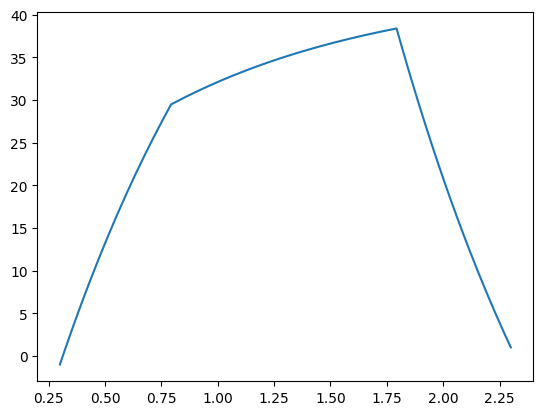

In [33]:
def finite_difference_variable_k_source(N, k):
    x = np.linspace(a, b, N+1)
    
    A = np.zeros((N+1, N+1))  # Матрица коэффициентов
    B = np.zeros(N+1)  # Правая часть
    
    # Заполняем систему уравнений
    for i in range(1, N):
        k_i_p_half = (k(x[i]) + k(x[i+1])) / 2  # k_{i+1/2}
        k_i_m_half = (k(x[i]) + k(x[i-1])) / 2  # k_{i-1/2}
    
        A[i, i-1] = -k_i_m_half / h**2
        A[i, i] = (k_i_p_half + k_i_m_half) / h**2
        A[i, i+1] = -k_i_p_half / h**2
    
        x_1 = a + (b - a) / 4
        x_2 = b - (b - a) / 4
        i_1 = np.argmin(np.abs(x - x_1))
        i_2 = np.argmin(np.abs(x - x_2))
        c1 = 0.5 * c
        c2 = 4 * c
        B[i_1] += c1 / h  # Источник в точке x_1 с мощностью c1
        B[i_2] += c2 / h  # Источник в точке x_2 с мощностью c2
    
    # Граничные условия
    A[0, 0] = 1
    B[0] = UA
    
    A[N, N] = 1
    B[N] = UB
    
    u = np.linalg.solve(A, B)
    
    return x, u  # Возвращаем значения u (решение) и x (узлы)

c = 1

def k(x):
    return np.exp(x)

x, U = finite_difference_variable_k_source(N, k)
plt.plot(x,U)

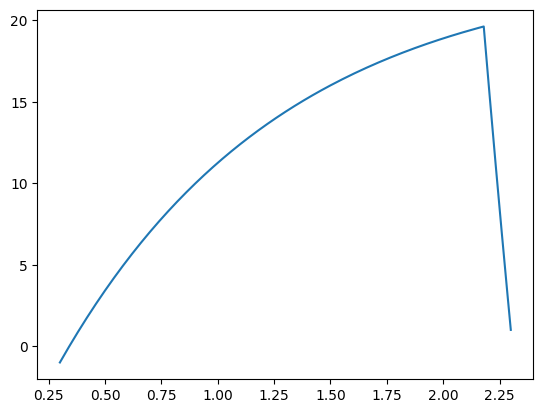

In [42]:
def finite_difference_variable_k_source(N, k):
    x = np.linspace(a, b, N+1)
    
    A = np.zeros((N+1, N+1))  # Матрица коэффициентов
    B = np.zeros(N+1)  # Правая часть
    
    # Заполняем систему уравнений
    for i in range(1, N):
        k_i_p_half = (k(x[i]) + k(x[i+1])) / 2  # k_{i+1/2}
        k_i_m_half = (k(x[i]) + k(x[i-1])) / 2  # k_{i-1/2}
    
        A[i, i-1] = -k_i_m_half / h**2
        A[i, i] = (k_i_p_half + k_i_m_half) / h**2
        A[i, i+1] = -k_i_p_half / h**2
    
        B[-10] += c / h  # Источник в точке x_0 = b - 10/N
    
    # Граничные условия
    A[0, 0] = 1
    B[0] = UA
    
    A[N, N] = 1
    B[N] = UB
    
    u = np.linalg.solve(A, B)
    
    return x, u  # Возвращаем значения u (решение) и x (узлы)

c = 10

def k(x):
    return np.exp(x)

x, U = finite_difference_variable_k_source(N, k)
plt.plot(x,U)

# 10.5.21 ==================

In [43]:
import numpy as np

# Задаем параметры задачи
a, b, c = 0, 3.0, 2.015
n = 100  # количество узлов сетки
h = (b - a) / (n - 1)  # шаг сетки
x = np.linspace(a, b, n)

# Функции для k(x), q(x) и f(x)
def k(x):
    if a <= x < c:
        return 1.5
    elif c <= x <= b:
        return 0.5

def q(x):
    if a <= x < c:
        return 8.3
    elif c <= x <= b:
        return 2.8

def f(x):
    return 8 / (1 + x**2)

# Матрицы для прогонки
A = np.zeros(n-2)
B = np.zeros(n-2)
C = np.zeros(n-2)
D = np.zeros(n-2)

# Построение матрицы для внутренней части
for i in range(1, n-1):
    A[i-1] = k(x[i]) / h**2
    B[i-1] = -2 * k(x[i]) / h**2 + q(x[i])
    C[i-1] = k(x[i]) / h**2
    D[i-1] = f(x[i])

# Учет краевых условий методом баланса
# Левое краевое условие: -k(a)u'(a) + 0.5*u(a) = 0
B[0] += 1 / h * k(x[0]) + 0.5
D[0] -= 0.5 * f(x[0])

# Правое краевое условие: k(b)u'(b) + 0.5*u(b) = 0
B[-1] += 1 / h * k(x[-1]) + 0.5
D[-1] -= 0.5 * f(x[-1])

# Прямой проход метода прогонки
alpha = np.zeros(n-2)
beta = np.zeros(n-2)
alpha[0] = -C[0] / B[0]
beta[0] = D[0] / B[0]

for i in range(1, n-2):
    alpha[i] = -C[i] / (B[i] + A[i] * alpha[i-1])
    beta[i] = (D[i] - A[i] * beta[i-1]) / (B[i] + A[i] * alpha[i-1])

# Обратный проход
u = np.zeros(n)
u[-2] = beta[-1]

for i in range(n-3, -1, -1):
    u[i+1] = alpha[i] * u[i+2] + beta[i]

# Решение на всей сетке
solution = u

solution


array([ 0.        , -0.00269471, -0.00284901,  0.00189071,  0.01147813,
        0.02583378,  0.04484571,  0.06837052,  0.09623452,  0.12823515,
        0.16414261,  0.20370161,  0.24663328,  0.29263728,  0.34139389,
        0.39256629,  0.44580287,  0.50073958,  0.55700232,  0.61420934,
        0.67197365,  0.72990541,  0.78761428,  0.84471173,  0.90081337,
        0.95554106,  1.00852518,  1.05940658,  1.10783864,  1.15348913,
        1.196042  ,  1.23519905,  1.27068155,  1.30223162,  1.32961363,
        1.35261538,  1.37104914,  1.38475264,  1.39358985,  1.3974516 ,
        1.39625617,  1.38994959,  1.3785059 ,  1.36192725,  1.34024379,
        1.31351348,  1.28182175,  1.245281  ,  1.20402998,  1.15823302,
        1.10807911,  1.05378095,  0.99557376,  0.93371404,  0.86847823,
        0.80016126,  0.72907496,  0.65554648,  0.57991654,  0.50253767,
        0.42377237,  0.34399126,  0.26357109,  0.18289284,  0.10233972,
        0.02229522, -0.05685894, -0.13474469, -0.20906913, -0.27

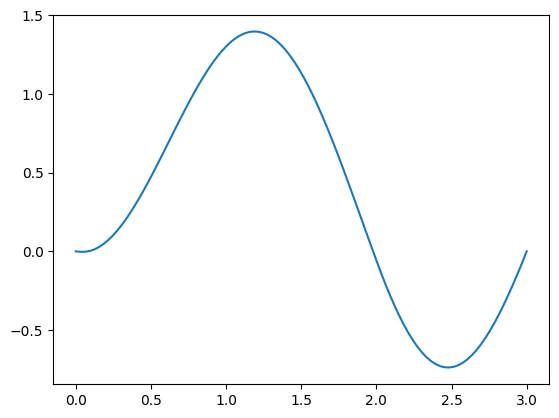

In [44]:
plt.plot(x,solution)